# 2. Resíduos Ponderados 02

Problema:
$$
\left \{ \begin{matrix} 
\frac{d^2 u}{dx^2} + \frac{du}{dx} + x = 0 \quad \ x \in [0, 1] \\
u(0) = 0 \\
u(1) = 2
\end{matrix}\right.
$$

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "figure.figsize": (8,6),
    "figure.dpi": 150,
    "figure.facecolor":'white'})

In [6]:
# Funções para plota gráficos
def plotexpr(u1,interv,label1):
    p1 = plot(u1,interv, label = label1, legend = true, grid= true, show = false)
    p1.show()
    return p1

def plot2expr(u1,u2,interv,N,label1,label2):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

def plot3expr(u1,u2,u3,interv,N,label1,label2,label3):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")
    f3 = lambdify(x, u3, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...
    ax.plot(xp, f3(xp), 'g:',label=label3)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

def plot4expr(u1,u2,u3,u4,interv,N,label1,label2,label3,label4):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")
    f3 = lambdify(x, u3, "numpy")
    f4 = lambdify(x, u4, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...
    ax.plot(xp, f3(xp), 'g:',label=label3)  # Plot more data on the axes...
    ax.plot(xp, f4(xp), 'k-.',label=label4)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

In [3]:
## Definindo as variaveis simbolicas
x, a, a1, a2 = symbols('x a a1 a2')

In [4]:
# Solução analitica
Y = 3*exp(-x+1)/(2*(1-exp(1))) + (- x**2/2 + x) - 3*exp(1)/(2*(1-exp(1)))
display(Y)

-x**2/2 + x + 3*exp(1 - x)/(2 - 2*E) - 3*E/(2 - 2*E)

## **b)**:

$$
\begin{matrix}
\phi_0 = 0, \\
\phi_1 = x(1-x), \\
\phi_2 = x^2(1-x)
\end{matrix} 
$$

In [5]:
print(Y.subs(x,0.25).evalf())
print(Y.subs(x,0.75).evalf())

0.743648013138159
1.72080573499332


In [7]:
## Definindo os limites da integral:
Li = 0
Lf = 1

In [8]:
## Definindo as funções aproximadoras
Fi0 = 2*x
Fi1 = x*(1-x)
Fi2 = x**2*(1-x)
Ficub = Fi0 + a1*Fi1 + a2*Fi2
display(Ficub)

Rf = lambda F: diff(F,x,2) + diff(F,x) + x


a1*x*(1 - x) + a2*x**2*(1 - x) + 2*x

In [9]:
# Calculo do resíduo na forma forte
Rcub = Rf(Ficub)
display(simplify(Rcub))

-2*a1*x - a1 - 3*a2*x**2 - 4*a2*x + 2*a2 + x + 2

In [10]:
I3 = Rcub.subs(x,0.5)
I4 = Rcub.subs(x,1)

In [11]:
ahcub = list(linsolve([I3, I4], (a1,a2)))[0]
ahcub

(1.32258064516129, -0.193548387096774)

In [12]:
Fih = Fi0 + ahcub[0]*Fi1 + ahcub[1]*Fi2
Fih

-0.193548387096774*x**2*(1 - x) + 1.32258064516129*x*(1 - x) + 2*x

In [13]:
print(Fih.subs(x,0.25))
print(Fih.subs(x,0.75))

0.738911290322581
1.72076612903226


In [14]:
Rh = Rf(Fih)
Ru = Rf(Y)

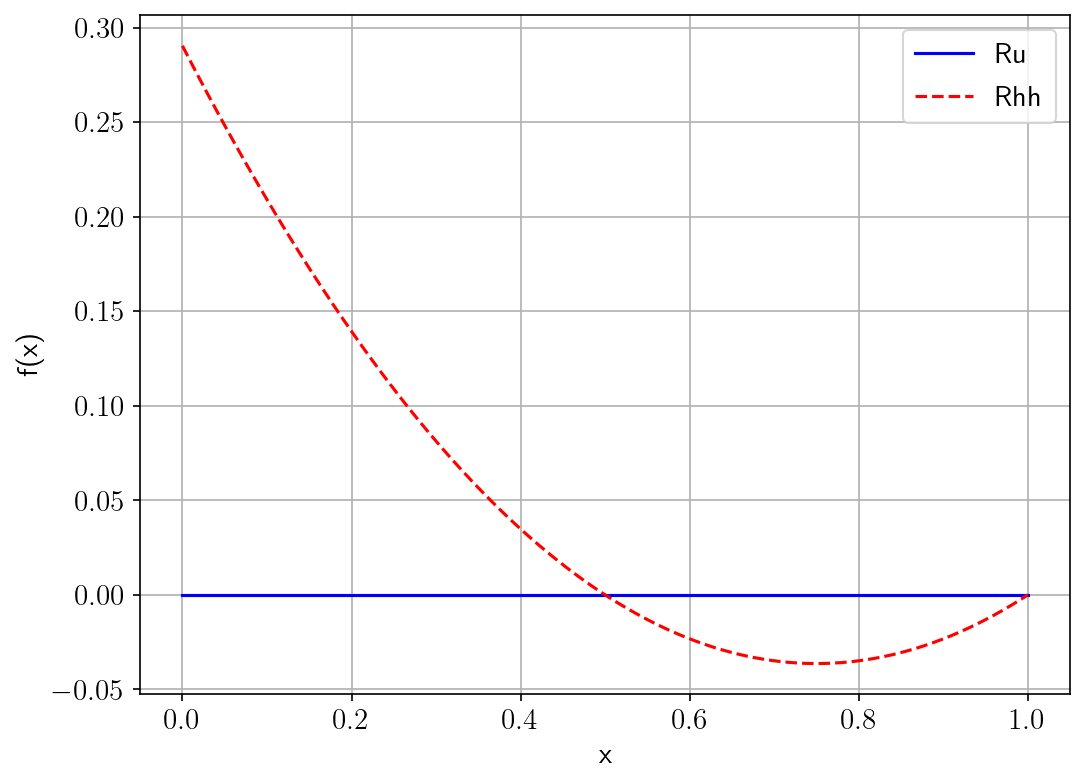

In [15]:
# p = plotexpr(Rh,(x,0,1),'Rh')
p = plot2expr(Ru,Rh,(x,0,1),100,'Ru','Rhh')

## **c)** Encontre uma solução aproximada usando a forma fraca e funções de aproximação e ponderadoras do mesmo tipo.

In [16]:
L1 = lambda F: diff(F,x) + F + x**2/2
Rb = L1(Ficub)
Rb

a1*x*(1 - x) - a1*x + a1*(1 - x) + a2*x**2*(1 - x) - a2*x**2 + 2*a2*x*(1 - x) + x**2/2 + 2*x + 2

In [17]:
I1f = integrate(Rb*diff(Fi1),(x,Li,Lf))
I2f = integrate(Rb*diff(Fi2),(x,Li,Lf))

In [18]:
af = list(linsolve([I1f, I2f], (a1,a2)))[0]
a1f = af[0]
a2f = af[1]
a1f,a2f

(83/61, -15/61)

In [19]:
Fif = Fi0 + a1f*Fi1 + a2f*Fi2
Fif

-15*x**2*(1 - x)/61 + 83*x*(1 - x)/61 + 2*x

## **d)** Econtre os valores aproximados para a função $u(x)$ para os pontos $x = .25$ e $x = .75$ considerando a aproximação da letra $b$.

In [20]:
print(Fif.subs(x,0.25))
print(Fif.subs(x,0.75))

0.743596311475410
1.72054303278689


## **e)** Compare as soluções obtidas e analise a consistência dos resultados

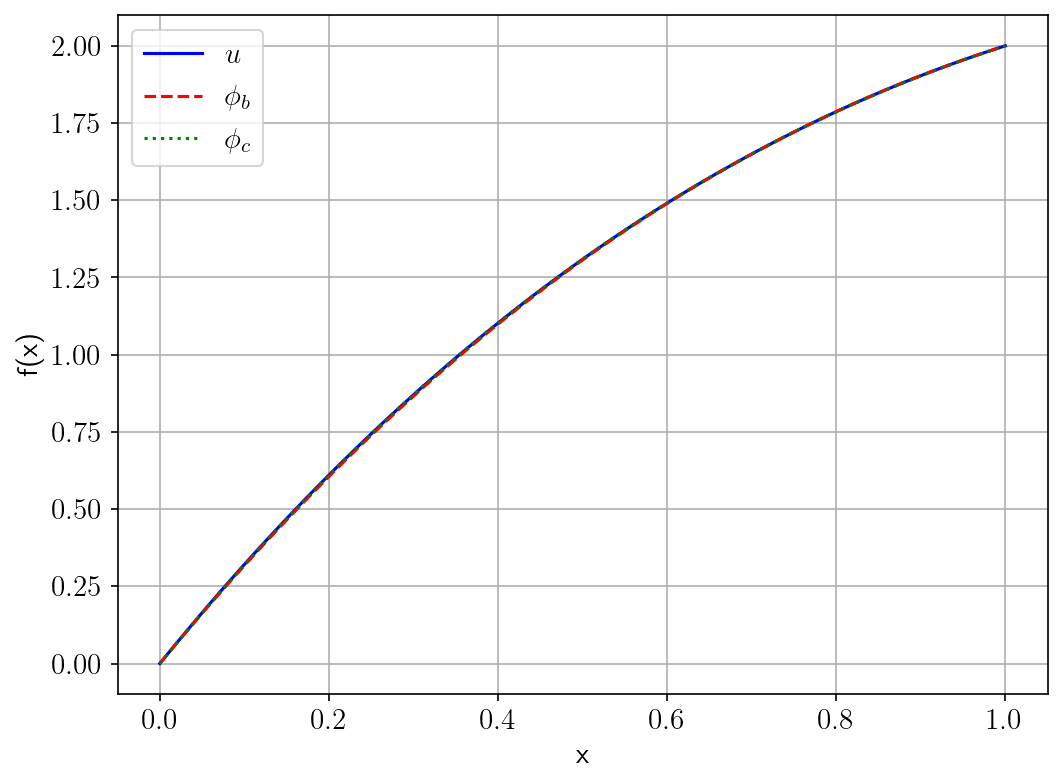

In [22]:
f,ax = plot3expr(Y,Fih,Fif,(x,0,1),100,'$u$','$\phi_b$','$\phi_c$')

## **d)** Explique porque as funções de aproximação abaixo não podem ser adotadas na solução do problema.

$$
\begin{matrix}
\phi_1 = x-1, \\
\phi_2 = (x-1)^2, \\
\phi_3 = 1
\end{matrix} 
$$